In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
df = pd.read_csv('data/final_train_data.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)

df = pd.read_csv('data/final_test_data.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)


y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)
sess1=tf.Session()
y_train, y_test = sess1.run([y_train,y_test])

x_Train4D=X_train.reshape(X_train.shape[0],2,11,1).astype('float32')
x_Test4D=X_test.reshape(X_test.shape[0],2,11,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=(2,2),
                 padding='same',
                 input_shape=(2,11,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(filters=36,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict,average='micro')
        _val_recall = recall_score(val_targ, val_predict,average='micro')
        _val_precision = precision_score(val_targ, val_predict,average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print (" — val_f1: %f — val_precision: %f — val_recall %f" %(_val_f1, _val_precision, _val_recall))
        return

In [4]:
metrics = Metrics()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_train,validation_split=0.2, callbacks=[metrics],
                        epochs=300, batch_size=300,verbose=2,validation_data=(x_Test4D_normalize,y_test))

Train on 1280 samples, validate on 320 samples
Epoch 1/300
 - 2s - loss: 2.2999 - accuracy: 0.1937 - val_loss: 2.2967 - val_accuracy: 0.4625


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/300
 - 0s - loss: 2.2906 - accuracy: 0.3383 - val_loss: 2.2874 - val_accuracy: 0.4656
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/300
 - 0s - loss: 2.2758 - accuracy: 0.4414 - val_loss: 2.2751 - val_accuracy: 0.4969
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/300
 - 0s - loss: 2.2572 - accuracy: 0.4047 - val_loss: 2.2592 - val_accuracy: 0.2937
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/300
 - 0s - loss: 2.2321 - accuracy: 0.4437 - val_loss: 2.2375 - val_accuracy: 0.5594
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/300
 - 0s - loss: 2.2014 - accuracy: 0.5148 - val_loss: 2.2095 - val_accuracy: 0.5562
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 7/300
 - 0s - loss: 2.1562 - accuracy: 0.6164 - val_loss: 2.1717 - val_accuracy: 0.6875
 — val_f1: 0.000000 — val_pr

 - 0s - loss: 0.1161 - accuracy: 0.9719 - val_loss: 0.5009 - val_accuracy: 0.8219
 — val_f1: 0.841060 — val_precision: 0.894366 — val_recall 0.793750
Epoch 53/300
 - 0s - loss: 0.1220 - accuracy: 0.9695 - val_loss: 0.4890 - val_accuracy: 0.8250
 — val_f1: 0.838284 — val_precision: 0.888112 — val_recall 0.793750
Epoch 54/300
 - 0s - loss: 0.1158 - accuracy: 0.9773 - val_loss: 0.5048 - val_accuracy: 0.8344
 — val_f1: 0.828383 — val_precision: 0.877622 — val_recall 0.784375
Epoch 55/300
 - 0s - loss: 0.1131 - accuracy: 0.9719 - val_loss: 0.4951 - val_accuracy: 0.8344
 — val_f1: 0.833333 — val_precision: 0.873288 — val_recall 0.796875
Epoch 56/300
 - 0s - loss: 0.1107 - accuracy: 0.9719 - val_loss: 0.4862 - val_accuracy: 0.8344
 — val_f1: 0.836601 — val_precision: 0.876712 — val_recall 0.800000
Epoch 57/300
 - 0s - loss: 0.1133 - accuracy: 0.9672 - val_loss: 0.4827 - val_accuracy: 0.8344
 — val_f1: 0.842276 — val_precision: 0.877966 — val_recall 0.809375
Epoch 58/300
 - 0s - loss: 0.0935 -

 — val_f1: 0.832000 — val_precision: 0.852459 — val_recall 0.812500
Epoch 103/300
 - 0s - loss: 0.0613 - accuracy: 0.9867 - val_loss: 0.4893 - val_accuracy: 0.8438
 — val_f1: 0.843450 — val_precision: 0.862745 — val_recall 0.825000
Epoch 104/300
 - 0s - loss: 0.0634 - accuracy: 0.9828 - val_loss: 0.5181 - val_accuracy: 0.8281
 — val_f1: 0.837359 — val_precision: 0.863787 — val_recall 0.812500
Epoch 105/300
 - 0s - loss: 0.0592 - accuracy: 0.9859 - val_loss: 0.4796 - val_accuracy: 0.8594
 — val_f1: 0.854400 — val_precision: 0.875410 — val_recall 0.834375
Epoch 106/300
 - 0s - loss: 0.0651 - accuracy: 0.9789 - val_loss: 0.4672 - val_accuracy: 0.8562
 — val_f1: 0.861244 — val_precision: 0.879479 — val_recall 0.843750
Epoch 107/300
 - 0s - loss: 0.0607 - accuracy: 0.9836 - val_loss: 0.4873 - val_accuracy: 0.8531
 — val_f1: 0.852090 — val_precision: 0.877483 — val_recall 0.828125
Epoch 108/300
 - 0s - loss: 0.0576 - accuracy: 0.9867 - val_loss: 0.4984 - val_accuracy: 0.8344
 — val_f1: 0.839

 — val_f1: 0.848101 — val_precision: 0.858974 — val_recall 0.837500
Epoch 153/300
 - 0s - loss: 0.0478 - accuracy: 0.9883 - val_loss: 0.5467 - val_accuracy: 0.8313
 — val_f1: 0.828571 — val_precision: 0.841935 — val_recall 0.815625
Epoch 154/300
 - 0s - loss: 0.0417 - accuracy: 0.9875 - val_loss: 0.5338 - val_accuracy: 0.8344
 — val_f1: 0.833597 — val_precision: 0.845659 — val_recall 0.821875
Epoch 155/300
 - 0s - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.5176 - val_accuracy: 0.8438
 — val_f1: 0.843602 — val_precision: 0.853035 — val_recall 0.834375
Epoch 156/300
 - 0s - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.5556 - val_accuracy: 0.8250
 — val_f1: 0.828025 — val_precision: 0.844156 — val_recall 0.812500
Epoch 157/300
 - 0s - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.5685 - val_accuracy: 0.8250
 — val_f1: 0.822967 — val_precision: 0.840391 — val_recall 0.806250
Epoch 158/300
 - 0s - loss: 0.0320 - accuracy: 0.9922 - val_loss: 0.5065 - val_accuracy: 0.8469
 — val_f1: 0.844

 — val_f1: 0.808917 — val_precision: 0.824675 — val_recall 0.793750
Epoch 203/300
 - 0s - loss: 0.0363 - accuracy: 0.9875 - val_loss: 0.5349 - val_accuracy: 0.8406
 — val_f1: 0.842271 — val_precision: 0.850318 — val_recall 0.834375
Epoch 204/300
 - 0s - loss: 0.0349 - accuracy: 0.9883 - val_loss: 0.5520 - val_accuracy: 0.8281
 — val_f1: 0.834921 — val_precision: 0.848387 — val_recall 0.821875
Epoch 205/300
 - 0s - loss: 0.0263 - accuracy: 0.9945 - val_loss: 0.5937 - val_accuracy: 0.8031
 — val_f1: 0.812102 — val_precision: 0.827922 — val_recall 0.796875
Epoch 206/300
 - 0s - loss: 0.0287 - accuracy: 0.9922 - val_loss: 0.5666 - val_accuracy: 0.8250
 — val_f1: 0.831210 — val_precision: 0.847403 — val_recall 0.815625
Epoch 207/300
 - 0s - loss: 0.0224 - accuracy: 0.9937 - val_loss: 0.5770 - val_accuracy: 0.8250
 — val_f1: 0.831210 — val_precision: 0.847403 — val_recall 0.815625
Epoch 208/300
 - 0s - loss: 0.0214 - accuracy: 0.9945 - val_loss: 0.5925 - val_accuracy: 0.8188
 — val_f1: 0.830

 — val_f1: 0.811410 — val_precision: 0.823151 — val_recall 0.800000
Epoch 253/300
 - 0s - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.6481 - val_accuracy: 0.8094
 — val_f1: 0.820919 — val_precision: 0.832797 — val_recall 0.809375
Epoch 254/300
 - 0s - loss: 0.0189 - accuracy: 0.9961 - val_loss: 0.6215 - val_accuracy: 0.8281
 — val_f1: 0.831746 — val_precision: 0.845161 — val_recall 0.818750
Epoch 255/300
 - 0s - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.6646 - val_accuracy: 0.8062
 — val_f1: 0.813990 — val_precision: 0.828479 — val_recall 0.800000
Epoch 256/300
 - 0s - loss: 0.0167 - accuracy: 0.9969 - val_loss: 0.6755 - val_accuracy: 0.8094
 — val_f1: 0.815873 — val_precision: 0.829032 — val_recall 0.803125
Epoch 257/300
 - 0s - loss: 0.0189 - accuracy: 0.9922 - val_loss: 0.6470 - val_accuracy: 0.8219
 — val_f1: 0.822785 — val_precision: 0.833333 — val_recall 0.812500
Epoch 258/300
 - 0s - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.6140 - val_accuracy: 0.8469
 — val_f1: 0.848

In [5]:
# 构造绘图函数
from matplotlib import pyplot as plt
def drow(history):
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, history['loss'], 'rx', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

#     plt.imsave('E:/acc_and_loss/Training and Validation loss.jpg')

    plt.figure()
    epochs = range(1, len(history['accuracy']) + 1)
    plt.plot(epochs, history['accuracy'], 'rx', label='Training acc')
    plt.plot(epochs, history['val_accuracy'], 'b', label='validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()

#     plt.imsave('E:/acc_and_loss/Training and validation acc.jpg')
    plt.show()

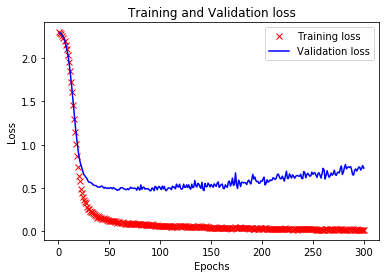

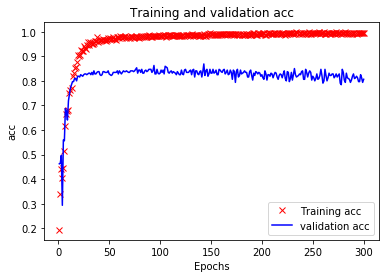

In [6]:
drow(train_history.history)